### IMPORT THE LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras import datasets

### LOAD THE INBUILD DATSET 

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

### PREPROCESSING THE DATA - NORMALIZATION

In [3]:
train_images, test_images = train_images / 255.0, test_images/255.0

In [4]:
class_names = ['Zero','one', 'two','three','four','five','six','seven','eight','nine']

In [5]:
### EXPLORE THE DATA 

### SHAPE OF TRAINING AND TEST IMAGES

In [6]:
print('shape of training images : ',train_images.shape)
print('shape of training images : ',train_labels.shape)

shape of training images :  (60000, 28, 28)
shape of training images :  (60000,)


In [7]:
print('shape of testing images : ',test_images.shape)
print('shape of testing label : ',test_labels.shape)

shape of testing images :  (10000, 28, 28)
shape of testing label :  (10000,)


### LABEL VALUES

In [8]:
print('label values :',np.min(train_images), "to" ,np.max(train_images))

label values : 0.0 to 1.0


In [9]:
### pixcel values

### BUILD THE MODEL

In [10]:
model = Sequential()
model.add(LSTM(100,input_shape=(28,28)))
model.add(Dense(10, activation = 'softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               51600     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
Total params: 52610 (205.51 KB)
Trainable params: 52610 (205.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### COMPILE THE MODEL

In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])


In [13]:
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
#model.add(tf.keras.layers.Dense(128,activation = 'relu'))
#model.add(tf.keras.layers.Dense(10))
#model.summary()

### FEED THE MODEL

In [14]:
history = model.fit(train_images,train_labels, epochs=20,validation_data= (test_images,test_labels))

Epoch 1/20
1875/1875 [==============================] - 61s 31ms/step - loss: 0.3455 - accuracy: 0.8913 - val_loss: 0.1264 - val_accuracy: 0.9613
Epoch 2/20
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1093 - accuracy: 0.9679 - val_loss: 0.1037 - val_accuracy: 0.9694
Epoch 3/20
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0741 - accuracy: 0.9779 - val_loss: 0.0775 - val_accuracy: 0.9771
Epoch 4/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0606 - accuracy: 0.9819 - val_loss: 0.0627 - val_accuracy: 0.9815
Epoch 5/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0501 - accuracy: 0.9850 - val_loss: 0.0550 - val_accuracy: 0.9835
Epoch 6/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0413 - accuracy: 0.9874 - val_loss: 0.0564 - val_accuracy: 0.9816
Epoch 7/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.0512 -

### plot accuracy and Epoch

(0.75, 1.0)

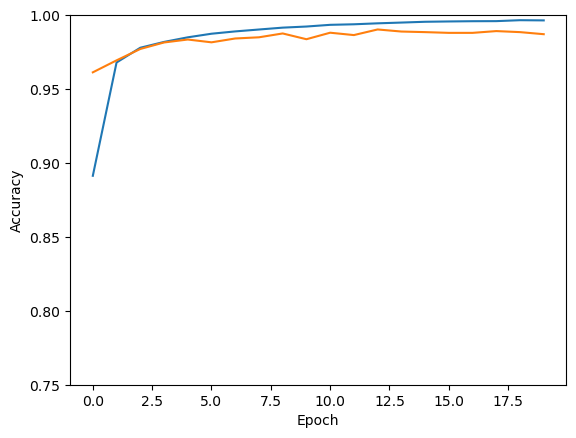

In [60]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
figsize=(2,2)
plt.ylim([0.75,1])
#plt.legent(loc='lower right')

In [20]:
test_loss,test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('Test accuracy : ', round(test_acc*100), '%')

313/313 - 3s - loss: 0.0498 - accuracy: 0.9871 - 3s/epoch - 11ms/step
Test accuracy :  99 %


### VERIFY AND VISULIZE PREDICTION

313/313 [==============================] - 4s 11ms/step


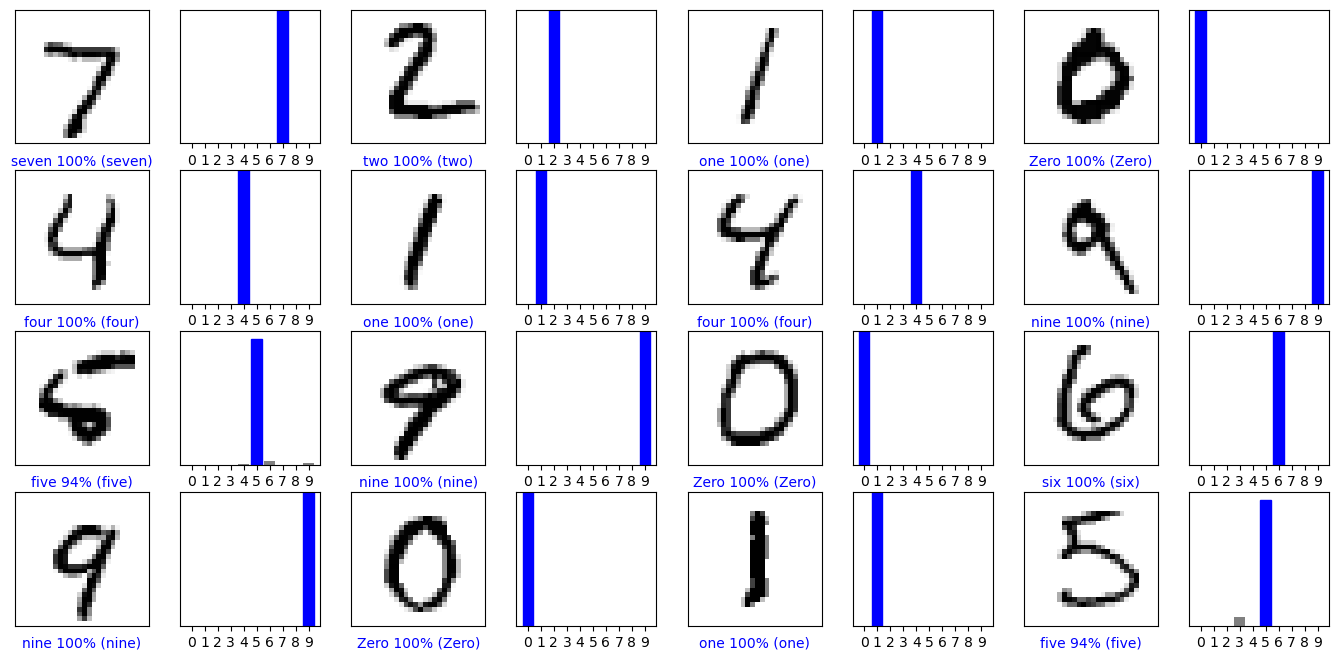

In [41]:
predictions = model.predict(test_images)

plt.figure(figsize = (17,8))

for i in range(16):
    plt.subplot(4,8,2*i+1)
    plt.xticks([])
    plt.yticks([])
    if np.argmax(prediction[i]) == test_labels[i]:
        color = 'blue'
    else:
        color = 'red'
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[np.argmax(predictions[i])],
                                         100*np.max(predictions[i]),class_names[test_labels[i]]),
                                         color=color)
    plt.subplot(4,8,2*i+2)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction[i], color ='gray')
    plt.ylim([0,1])
    
    thisplot[np.argmax(predictions[i])].set_color('red')
    thisplot[test_labels[i]].set_color('blue')
plt.show()

### USE THE TRAIN MODEL

In [42]:
img = test_images[50]
print(img.shape)

(28, 28)


In [44]:
img = (np.expand_dims(img,0))

In [45]:
print(img.shape)

(1, 28, 28)


### THEN, IMAGES CAN BE FED INTO THE MODEL FOR PREDICTION

In [47]:
predictions_img = model.predict(img)

max_confidence = np.argmax(predictions_img[0])

print('the highest confidence is : ', max_confidence)
print('the predicted class is :', class_names[max_confidence])

1/1 [==============================] - 0s 54ms/step
the highest confidence is :  6
the predicted class is : six


### LET'S VISUVALIZE THE RESULTS.

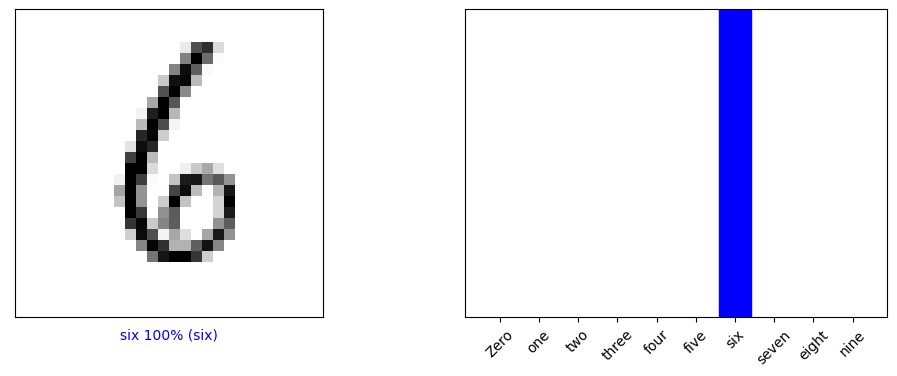

In [57]:
plt.figure(figsize = (12,4))

i=140
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
if np.argmax(prediction[i]) == test_labels[i]:
    color = 'blue'
else:
    color = 'red'
plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.xlabel('{} {:2.0f}% ({})'.format(class_names[np.argmax(predictions[i])],
                    100*np.max(predictions[i]),class_names[test_labels[i]]),color=color)
plt.subplot(1,2,2)
plt.xticks(range(10),class_names,rotation = 45)
plt.yticks([])
thisplot = plt.bar(range(10), prediction[i], color ='gray')
plt.ylim([0,1])
    
thisplot[np.argmax(predictions[i])].set_color('red')
thisplot[test_labels[i]].set_color('blue')
plt.show()